In [1]:
'''Q1-1:Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the k
  as the hyper-parameter for the number of neighbors. Moreover, the user can select f by passing "equal_weight" or "remove_outliers" 
  to switch between the two possible cases for  f'''

'Q1-1:Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the k\n  as the hyper-parameter for the number of neighbors. Moreover, the user can select f by passing "equal_weight" or "remove_outliers" \n  to switch between the two possible cases for  f'

In [11]:
import numpy as np
class myknn_regressor:
    def __init__(self, k, method):
        self.k = k
        self.method = method

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        # calculate the distance of 1 test obsevation and the whole train observation
        def dist(x_test, x_train):
            return ((x_train - x_test) ** 2).sum(axis=1) ** 0.5
            # return (np.linalg.norm(x_train - x_test, axis=1))
        prediction = []
        if (self.method == 'remove_outliers') & (self.k >= 10):
            for x in X_test:
                y_index = np.argpartition(dist(x, self.X_train), self.k)[:self.k]
                y_list = self.Y_train[y_index]
                q1, q3 = np.percentile(y_list, [25, 75])
                iqr = q3 - q1
                predict_y = y_list[(y_list >= (q1 - 1.5 * iqr)) & (y_list <= (q3 + 1.5 * iqr))].mean()
                prediction.append(predict_y)

        else:
            for x in X_test:
                y_index = np.argpartition(dist(x, self.X_train), self.k)[:self.k]
                predict_y = self.Y_train[y_index].mean()
                prediction.append(predict_y)

        return np.array(prediction)

In [2]:
'''Q1_2
Load data from msd_data1.pickle. 
Then, standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model.
Make predictions using  k=20 and "equal_weight". 
List the RMSE and the first 20 predictions in the testing data'''

'Q1_2\nLoad data from msd_data1.pickle. \nThen, standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model.\nMake predictions using  k=20 and "equal_weight". \nList the RMSE and the first 20 predictions in the testing data'

In [13]:
import pickle
import math
file_path = '/Users/ryanhuang/Desktop/107-2/statistical learning/week1/question/msd_data1.pickle'
fh = open(file_path, 'rb')
data = pickle.load(fh)
def RMSE(predict_value, actual_value):
    return math.sqrt(sum((predict_value - actual_value) ** 2)/len(predict_value))

In [14]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(data['X_train'],data['Y_train'] )
y_pred = myknn.predict(data['X_test'][:20])
y_actual = data['Y_test'][:20]
print('RMSE =',RMSE(y_pred,y_actual),'\nPredictions =',y_pred)

RMSE = 7.651707325819516 
Predictions = [1995.45 1994.55 2002.05 1995.2  2000.3  2000.3  1999.4  1996.5  1999.95
 2001.45 2004.55 2003.45 1999.55 1996.55 1990.65 1997.45 1993.7  1999.55
 2000.75 1983.8 ]


In [5]:
'''Q1_3 
Load data from msd_data1.pickle. 
Standardized all feature values so that all features have a zero mean and unit variance. 
Make predictions using k=20 and "remove_outier". 
List the RMSE and the first 20 predictions in the testing data.'''


'Q1_3 \nLoad data from msd_data1.pickle. \nStandardized all feature values so that all features have a zero mean and unit variance. \nMake predictions using k=20 and "remove_outier". \nList the RMSE and the first 20 predictions in the testing data.'

In [15]:
std_x_train = (data['X_train'] - data['X_train'].mean(0))/data['X_train'].std(0)
y_train = data['Y_train']
std_x_test = (data['X_test'] - data['X_test'].mean(0))/data['X_test'].std(0)
myknn_2 = myknn_regressor(20, "remove_outliers")
myknn_2.fit(std_x_train,y_train)
y_pred_2 = myknn_2.predict(std_x_test[:20])
y_actual_2 = data['Y_test'][:20]
print('RMSE =',RMSE(y_pred_2,y_actual_2),'\nPredictions =',y_pred_2)

RMSE = 7.077463667957082 
Predictions = [1992.9        1994.05       2000.05       1992.73684211 1992.8
 2000.         1987.1        1990.9        2001.8        2003.94736842
 2001.15       2000.94444444 1995.55       1997.2        1998.61111111
 1997.35       1992.15       2004.23529412 2003.6        1995.75      ]


In [8]:
'''
Compute the RMSE on the testing dataset under 3 cases using k=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200. 
In the first case, all feature values are standardize to have unit variances and zero means. 
In the second case, do not apply feature scaling. 
In the third case use standardized feature and adopted myknn_regressor with "remove_outlier" to make prediction.
'''

'\nCompute the RMSE on the testing dataset under 3 cases using k=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200. \nIn the first case, all feature values are standardize to have unit variances and zero means. \nIn the second case, do not apply feature scaling. \nIn the third case use standardized feature and adopted myknn_regressor with "remove_outlier" to make prediction.\n'

In [16]:
from sklearn.neighbors import KNeighborsRegressor
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

case1_summary = []
for k in k_list:
    knn_case1 = KNeighborsRegressor(n_neighbors=k)
    knn_case1.fit(std_x_train,y_train)
    y_pred = knn_case1.predict(std_x_test)
    case1_summary.append(RMSE(y_pred, data['Y_test']))

case2_summary = []
for k in k_list:
    knn_case2 = KNeighborsRegressor(n_neighbors=k)
    knn_case2.fit(data['X_train'],data['Y_train'])
    y_pred = knn_case2.predict(data['X_test'])
    case2_summary.append(RMSE(y_pred, data['Y_test']))
case3_summary = []
for k in k_list:
    knn_case3 = myknn_regressor(k,'remove_outlier')
    knn_case3.fit(std_x_train, y_train)
    y_pred = knn_case3.predict(std_x_test)
    case3_summary.append(RMSE(y_pred, data['Y_test']))

In [ ]:
# plot a curve that shows the relations between k (x-axis) and RMSE (y-axis)

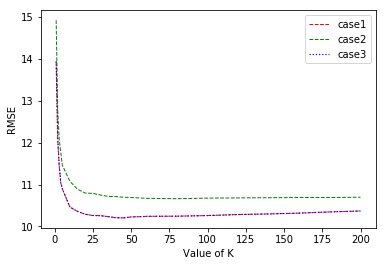

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_list,case1_summary,color='red', linewidth=1.0, linestyle='--', label='case1')
plt.plot(k_list,case2_summary,color='green', linewidth=1.0, linestyle='--', label='case2')
plt.plot(k_list,case3_summary,color='blue', linewidth=1.2, linestyle=':', label='case3')
plt.legend(loc='upper right')
plt.xlabel('Value of K')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# From the above 3 curves, we can notice that:
# 1) Standardized the features improves the RMSE a lot.
# 2) The 'remove_outlier' case is very similar to the conventional approach, meaning that there aren't many outliers in the test data.
# 3) The K resulting the minimum RMSE is K = 45 for case 1 and 3, and that for case 2 is K = 80
# 4) Overall the predictions are not bad